# Data Analysis with Text

The focus is what can be done on text data before NLP sentiment analysis. They are told to use seaborn and matplotlib only

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\20193820\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Transformation

They are require to load the data and order the activites by date

In [2]:
df=pd.read_excel('Diary.xlsx')
df=df.iloc[:-1,:-1]
df.tail()

,Date,Activities
10,2000-05-29 00:00:00,The following concerns a question in a physic...
11,2000-06-08 00:00:00,The more I work at the Student Publications b...
12,2000-06-07 00:00:00,"urlLink PSone, the portable Sony Playstation ..."
13,2000-06-07 00:00:00,A giant development in the world of cyberneti...
14,2000-06-07 00:00:00,"This does not seem like much, but the implica..."


## 1. Order the Activities

In [3]:
df['Date']=pd.to_datetime(df['Date']).dt.date
df=df.sort_values(by='Date')
df.head()

,Date,Activities
3,2000-05-22,I can smell her now. The scent is reminiscent...
1,2000-05-23,urlLink Mac OS 9 versus Corel Linux ? At firs...
2,2000-05-23,Have they found out the urlLink mechanism for...
0,2000-05-24,I wish I was back in high school for this one...
7,2000-05-29,Last season was the first time I truly watche...


# Data Visualization

They are required to plot the countof activities a day and Build the entire story using print

## 2. Bar chat of daily writing

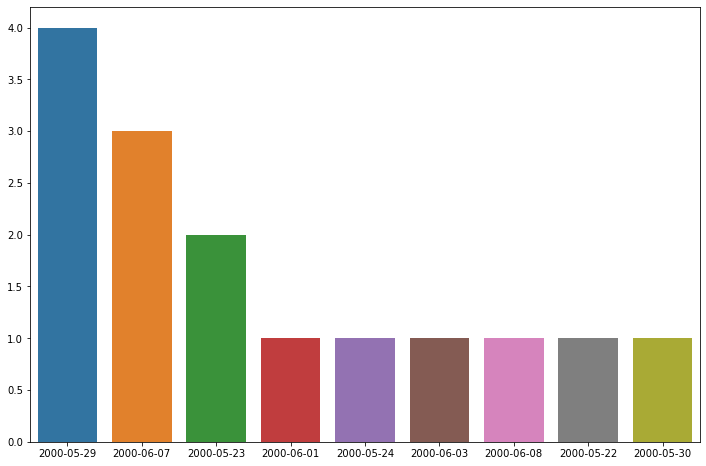

In [4]:
fig=plt.figure(figsize=(12,8))
sns.barplot(df.Date.value_counts().index,df.Date.value_counts().values)
fig.show()

## 3. Build the Story

In [5]:
for val in df.iloc[:,-1]:
    print(val)

 I can smell her now. The scent is reminiscent of a powder. Not baby powder, but a dry, mute aroma. A floral accent is present, similar to lilacs yet not as pungent. Before this, I only had one visual. The setting is always the same. Nighttime turns red to grey and yellow to white. She stands softly with her back to a wall of windows, covered mostly with draperies. It seems to be our bedroom. The visual of her is the strongest. Long, straight hair frames her oval face, giving her an intelligent air. The color black is an understatement, for her raven hair is so dark it is translucent. The contrast to her pale skin is remarkable. Though barely visible in the moonlight, her eyes burn with a comfortable evil. She is definitely my equal. Her attire is still a bit hazy. The Japanese aspects of my psyche scream out kimono, yet it could just be a simple shapeless dress she is wearing. The setting speaks that we are home for the night, or we could have just gotten home. There are many things I

# Statistics

The code for 4. will be available for them, but thy need to write the code for 5. and 6. and explain the insights they get

## 4. Count words in each activity

In [6]:
import re
from nltk import word_tokenize, pos_tag
df['Word_count'] = df.iloc[:,-1].apply(lambda x: len(re.findall(r'\w+', x)))
df['Noun_count'] = df.iloc[:,1].apply(lambda x: sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('NN')))
df['Verb_count'] = df.iloc[:,1].apply(lambda x: sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('VB')))
df.head()

,Date,Activities,Word_count,Noun_count,Verb_count
3,2000-05-22,I can smell her now. The scent is reminiscent...,255,50,47
1,2000-05-23,urlLink Mac OS 9 versus Corel Linux ? At firs...,41,13,5
2,2000-05-23,Have they found out the urlLink mechanism for...,9,3,2
0,2000-05-24,I wish I was back in high school for this one...,91,25,14
7,2000-05-29,Last season was the first time I truly watche...,26,6,6


## 5. Plot word count over noun count

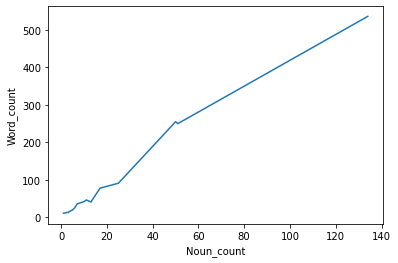

In [7]:
sns.lineplot(x='Noun_count',y='Word_count',data=df)

## 6. Plot the pairplot 

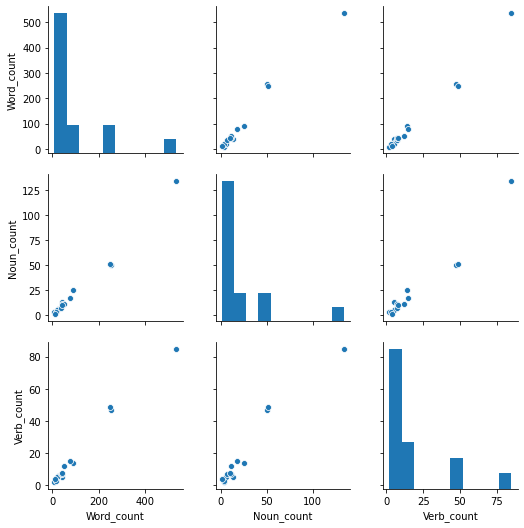

In [8]:
sns.pairplot(df)

The plot show that the word_count is correlated to both noun and verbcount

# Modelling: Linear Regression

This group will apply what they learned last week. they will write the code from scratch for 7. and 8. But you need to guide them through 8.

## 7. Train a Linear Regression and show the accuracy

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df.iloc[:, 3:]
y=df.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)
reg= LinearRegression()
reg.fit(X_train, y_train)
print('Acurracy of Model: ',reg.score(X_test, y_test)*100)

Acurracy of Model:  99.79296371163095


## 8. Predict the word count 

Here they will be given a table of noun and verb count to predict word count

In [10]:
X_validate=pd.DataFrame()
X_validate['Noun_count']=[45, 80, 7]
X_validate['Verb_count']=[7,18,4]
np.round(reg.predict(X_validate))

array([121., 233.,  25.])

Their presentation should focus on:

- The data type and order
- the additional transformation
- model to predict word count and accuracy